# Health Insurance Cross Sell Prediction Predictive Analysis

## About the data
<h4>
The dataset is obtained from an insurance company that provides health insurance. This company aims to find potential customers to sell their vehicle insurance package. <br> They aim to build a predictive model that can accurately model whether a customer will be interested in their vehicle insurance package.<br>
For more information on the data, visit https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction<br><br>
The following table describes the annotations for each variable: <br>
</h4>
<table>
<tr>
<th>Variable</th>
<th>Description</th>
</tr>
<tr>
<td>id</td>
<td>Unique ID for the customer, Numerical</td>
</tr>
<tr>
<td>Gender</td>
<td>String, Gender of the customer: Male, Female</td>
</tr>
<tr>
<td>Age</td>
<td>Numerical, Age of customer </td>
</tr>
<tr>
<td>Driving_License</td>
<td>Numerical, 0: Customer does not have DL, 1: Customer already has DL</td>
</tr>
<tr>
<td>Region_Code</td>
<td>Numerical, Unique code for the region of the customer</td>
</tr>
<tr>
<td>Previously_Insured</td>
<td> Numerical, 0: Customer doesn't have Vehicle Insurance, 1: Customer already has Vehicle Insurance </td>
</tr>
<tr>
<td>Vehicle_Age</td>
<td>Numerical, Age of the Vehicle </td>
</tr>
<tr>
<td>Vehicle_Damage</td>
<td> Numerical, 0: Customer didn't get his/her vehicle damaged in the past, 1: Customer got his/her vehicle damaged in the past.  </td>
</tr>
<tr>
<td>Annual_Premium</td>
<td> Numerical, The amount customer needs to pay as premium in the year </td>
</tr>
<tr>
<td>Policy_Sales_Channel</td>
<td> Numerical, Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.</td>
</tr>
<tr>
<td>Vintage</td>
<td> Numerical, Number of Days Customer has been associated with the company. </td>
</tr>
<tr>
<td>Response</td>
<td> Target variable, Numerical, 0 : Customer is not interested,	1 : Customer is interested.</td>
</tr>

</table>


In [ ]:
from data_loader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load data
train_url = "https://raw.githubusercontent.com/Mkho-cs/HICSP-Predictive-Analysis/main/dataset/train.csv"
test_url = "https://raw.githubusercontent.com/Mkho-cs/HICSP-Predictive-Analysis/main/dataset/test.csv"
train_data = DataLoader(train_url)
# test_data = DataLoader(test_url)

## Data Transformation & EDA

In [3]:
train_data.display(10, True)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [4]:
# Data transformation starts here
"""
From the training data description, we can find features that are not important for training.
Hence, drop the following: id
"""
dropped = ['id']
train_data.drop_column(dropped)
train_data.display(10, True)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [5]:
"""
Variables can be broadly divided into numerical and categorical
Pandas automatically identifies the data type after loading,
but they are not usually identified as categorical (e.g. 1's and 0's are integers)

Hence, some variables must be coverted manually.
"""
# First, check the types from default data loading
train_data.display_types()

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [6]:
# Map string (object) columns with numerical replacements
gender_ref = {'Male': 0, 'Female': 1}
vehicle_damage_ref = {'No': 0, 'Yes': 1}
vehicle_age_ref = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}

train_data.map_column('Gender', gender_ref)
train_data.map_column('Vehicle_Damage', vehicle_damage_ref)
train_data.map_column('Vehicle_Age', vehicle_age_ref)
train_data.display_types()

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

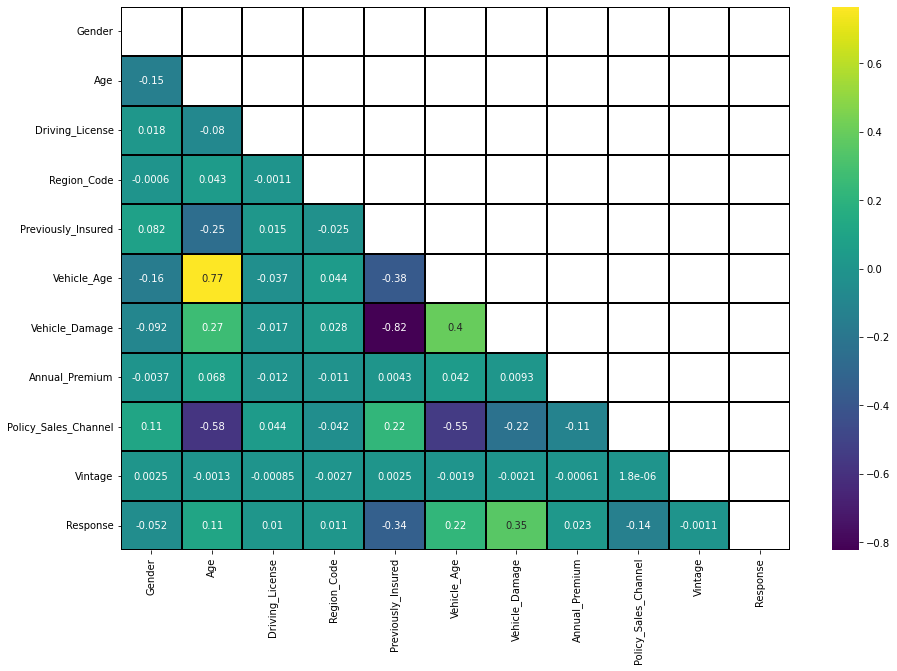

In [7]:
# Plot correlation heatmap to observe relationship of predictors to each other and to target variable Response
train_data.corr_heatmap()

In [11]:
# Change selected columns to categorical
cols_to_cat = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel', 'Response']
train_data.column_to_cat(cols_to_cat)
train_data.display_types()

Gender                  category
Age                        int64
Driving_License         category
Region_Code             category
Previously_Insured      category
Vehicle_Age             category
Vehicle_Damage          category
Annual_Premium           float64
Policy_Sales_Channel    category
Vintage                    int64
Response                category
dtype: object

In [12]:
# Analysze the frequency of each unique value in respective columns (for categorical variables)
col_unique_freq = train_data.get_col_unique_freq()
for col in col_unique_freq: print(col, '\n')

Gender
0    206089
1    175020
dtype: int64 

Driving_License
0       812
1    380297
dtype: int64 

Region_Code
0.0       2021
1.0       1008
2.0       4038
3.0       9251
4.0       1801
5.0       1279
6.0       6280
7.0       3279
8.0      33877
9.0       3101
10.0      4374
11.0      9232
12.0      3198
13.0      4036
14.0      4678
15.0     13308
16.0      2007
17.0      2617
18.0      5153
19.0      1535
20.0      1935
21.0      4266
22.0      1309
23.0      1960
24.0      2415
25.0      2503
26.0      2587
27.0      2823
28.0    106415
29.0     11065
30.0     12191
31.0      1960
32.0      2787
33.0      7654
34.0      1664
35.0      6942
36.0      8797
37.0      5501
38.0      2026
39.0      4644
40.0      1295
41.0     18263
42.0       591
43.0      2639
44.0       808
45.0      5605
46.0     19749
47.0      7436
48.0      4681
49.0      1832
50.0     10243
51.0       183
52.0       267
dtype: int64 

Previously_Insured
0    206481
1    174628
dtype: int64 

Vehicle_Age
0    16

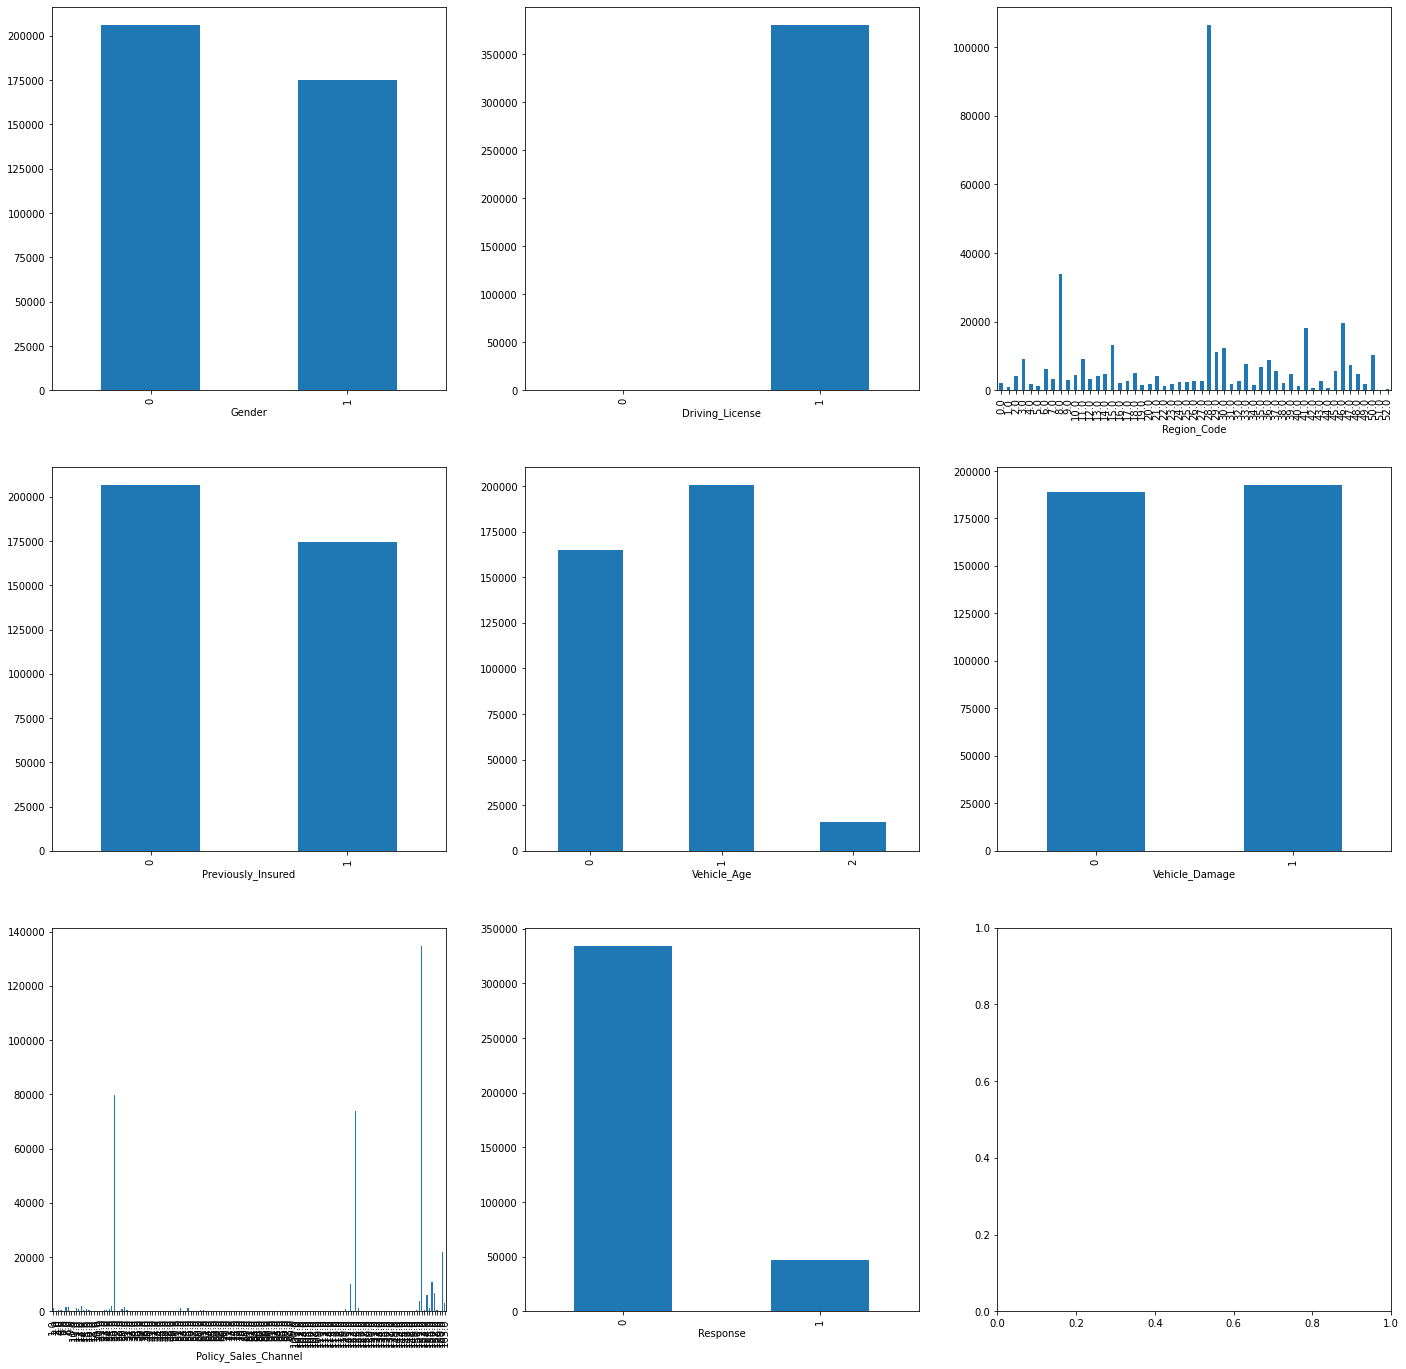

In [13]:
# Distribution plot of categorical columns
"""
The data for categorical variables seems to be well-distributed for the exception of Driving_License
However, upon close inspection on the table form, there is some count of records with Driving_License = 0
Hence, all categorical features here will be used.
"""
train_data.create_subplots(col_unique_freq, 3)


## Prepare Data for Modelling

In [14]:
from sklearn.model_selection import train_test_split
from utils import create_pipeline, create_cat_encoder,create_minmax_scaler, pipeline_fit_transform

In [15]:
y = train_data.data.Response
train_data.drop_column(['Response'])    # remove dependent variable from training

In [16]:
# Training data preparation pipeline
cols_cat = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel']
cat_encoder = create_cat_encoder(cols_cat)  # encoder for categorical variables
scaler = create_minmax_scaler() # minmax normalization
prep_pipeline = create_pipeline([("cat_encoder", cat_encoder), ("scaler", scaler)])
train_prep = pipeline_fit_transform(prep_pipeline, train_data.data)

In [17]:
"""
The training dataset is large enough to create a single validation set
Tesing dataset will be used for inference only (there is no 'Response' column)
"""
# Split 75-25 for train-validate sets 
x_train, x_val, y_train, y_val = train_test_split(train_prep, y, random_state=1234) 
print(x_train.shape, x_val.shape, sep='\n')

(285831, 10)
(95278, 10)


## Predictive Modelling

In [18]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from utils import evaluate_roc_auc, plot_roc

In [19]:
"""
This section will be mostly experimenting with different predictive models.
The ROC-AUC score metrics will be used since dataset is imbalanced (significant difference of 0's and 1's in Response)
"""
# Predictive modelling starts here
# Initialize models

model_rf_1 = RandomForestClassifier()
model_ada_1 = AdaBoostClassifier()
model_xgb_1 = xgb.XGBClassifier(use_label_encoder=False , objective='binary:logistic', eval_metric='logloss')

train = {0: x_train, 1: y_train}
val = {0: x_val, 1: y_val}

## Train and evaluate models

### Random Forest models

Training score: 0.9999998527238513
Validation score:  0.8347906306810223


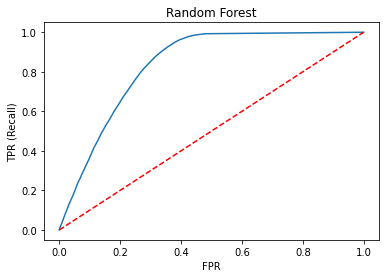

In [20]:

model_rf_1.fit(x_train, y_train)
train_roc_auc, val_roc_auc = evaluate_roc_auc(model_rf_1, train, val)
print("Training score:", train_roc_auc)
print("Validation score: ", val_roc_auc)
plot_roc(model_rf_1, val, "Random Forest")

### AdaBoost models

Training score: 0.8518133636050063
Validation score:  0.8535854267892007


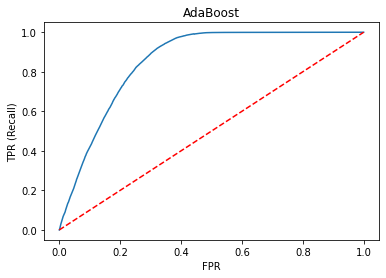

In [21]:
model_ada_1.fit(x_train, y_train)
train_roc_auc, val_roc_auc = evaluate_roc_auc(model_ada_1, train, val)
print("Training score:", train_roc_auc)
print("Validation score: ", val_roc_auc)
plot_roc(model_ada_1, val, "AdaBoost")

XGBoost models

Training score: 0.8794344837597569
Validation score:  0.8574592910457874


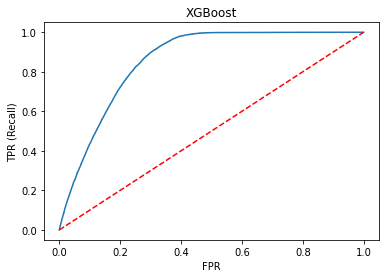

In [22]:
model_xgb_1.fit(x_train, y_train)
train_roc_auc, val_roc_auc = evaluate_roc_auc(model_xgb_1, train, val)
print("Training score:", train_roc_auc)
print("Validation score: ", val_roc_auc)
plot_roc(model_xgb_1, val, "XGBoost")